# **Fraud Detection**

#**Load, Structure of Data and Summary Statistics**

**Loaded the transactions data in line-delimited JSON format**

**Loaded JSON format into Pandas Data Frames which are just like SQL or Excel Tables**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_json('C:/Users/abhis/Desktop/Data-Analysis-of-Digital-Payments-and-Fraud-Detection-main/transactions.txt', lines=True)


**Necessary Python Packages and Libraries are loaded for further analysis**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#**Structure of the data**

**Displayed Both Top and Bottom rows of the data to have a better look on the structure and attributes before doing any data analysis**

In [4]:
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [5]:
df.tail(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,,1283.28,,,,False,,,False,False
786362,732852505,732852505,50000,48666.83,2016-12-30T20:10:29,72.18,Uber,US,US,05,...,,1333.17,,,,False,,,False,False


**Some Basic Information about the dataset which includes the Type of columns it has, number of columns and total number of records**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [7]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [8]:
len(df)

786363

In [9]:
len(df.columns)

29

**Shape represents the Dimensions like a Matrix**

**Number of Records = 786363**

**Number of Attributes/Columns = 29**

In [10]:
df.shape

(786363, 29)

**Describe helps in Analyzing the data at a glance** 

In [11]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


**Checking for Null values in data, because either these are filled with an appropriate value with respect to each column or completely removed from the dataset, depending on a given use case**

In [12]:
df.replace('', np.nan, inplace=True)
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

**Unique Values in each attribute also helps explore the structure of the dataset**

In [13]:
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  3
echoBuffer                       0
currentBalance              487318
merchantCity                     0
merchantState                    0
merchantZip                      0
cardPresent                      2
posOnPremises                    0
recurringAuthInd                 0
expirationDateKeyInMatch         2
isFraud             



**Here that most important attribute is "isFraud" which has 1.6% True Values**

In [14]:
df['isFraud'].value_counts()

isFraud
False    773946
True      12417
Name: count, dtype: int64

In [15]:
colsToObserve = df.columns[(df.nunique() <= 10)]

**When an attribute has less number of Unique Values it is always a good criteria to look at them keenly to know more about the structure as a whole and how the other attributes are behaving around these small buckets**

In [16]:
for col in colsToObserve:
  if len(df[col].unique())>1:
    print(col + " : ")
    print(df[col].unique())

creditLimit : 
[ 5000  2500 50000 15000 10000   250   500  1000  7500 20000]
acqCountry : 
['US' nan 'CAN' 'MEX' 'PR']
merchantCountryCode : 
['US' 'CAN' nan 'PR' 'MEX']
posEntryMode : 
['02' '09' '05' '80' '90' nan]
posConditionCode : 
['01' '08' '99' nan]
transactionType : 
['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' nan]
cardPresent : 
[False  True]
expirationDateKeyInMatch : 
[False  True]
isFraud : 
[False  True]


# **Data Visualization**


**Plots, Histograms, Box Plots, Correlation Matrix and Hypothesis about the Structure of Data, Deep Diving in Fraudulent Aspects to find correlation and causation**

**Converting True/False Booleans as 0s and 1s**

In [17]:
df[["isFraud", "cardPresent", "expirationDateKeyInMatch", ]] *= 1

**Buckets/Unique Values in Credit Card Limit are shown below:**

**Most of the Credit Cards have 5000 as their limit, on second number it is 15000. Interestingly, credit cards with 50,000 limit also exists in the dataset**

c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


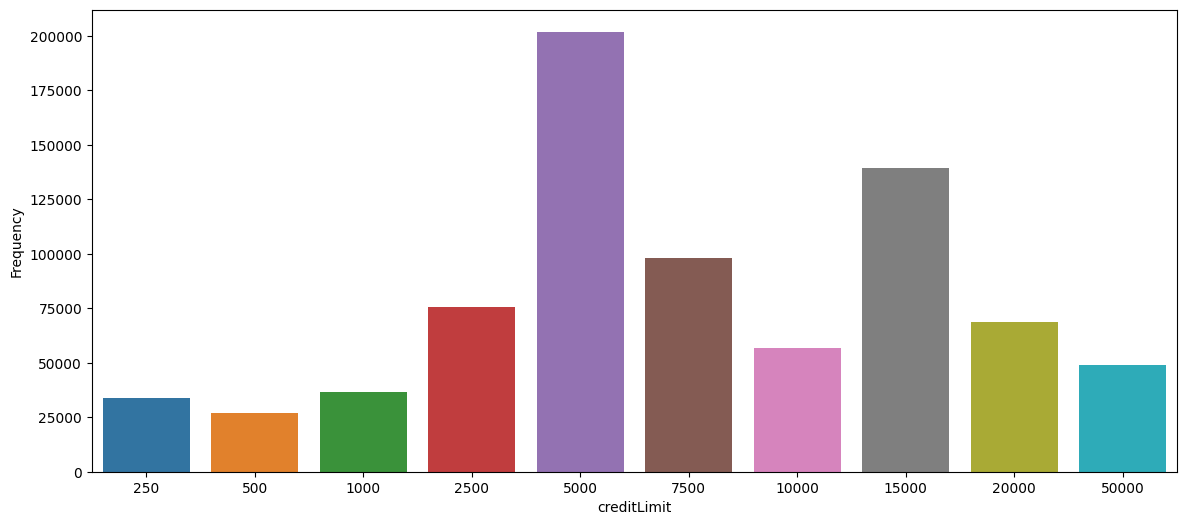

In [18]:
import seaborn as sns



e=pd.DataFrame(df.creditLimit.value_counts()).reset_index(drop=False)
e.columns=['creditLimit','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="creditLimit", y="Frequency", data=e) # draw barplot

**4 Types of Merchant Country Code exists in the datset where US is a dominant entity as shown**

c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


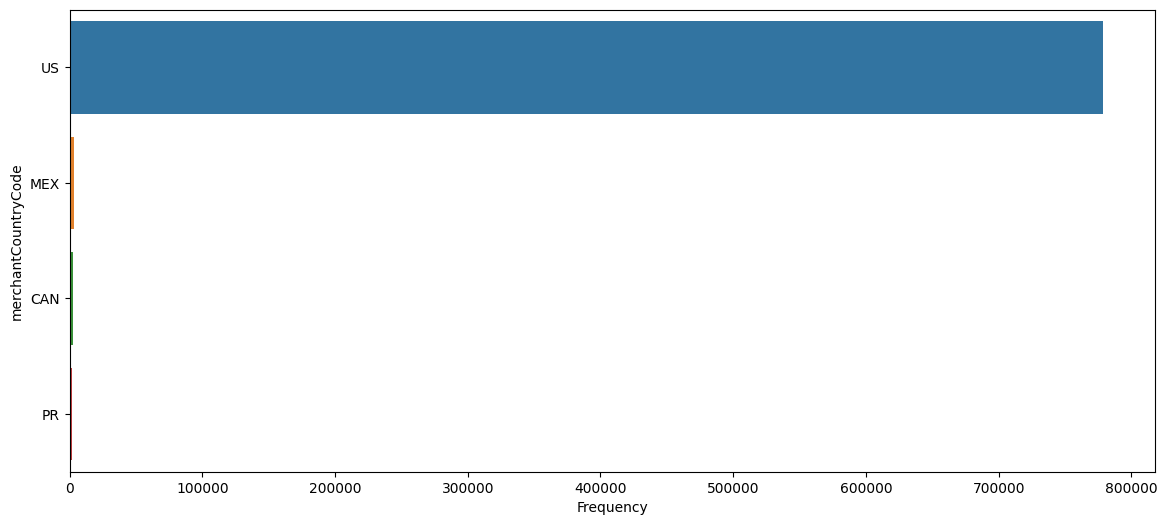

In [19]:
e=pd.DataFrame(df.merchantCountryCode.value_counts()).reset_index(drop=False)
e.columns=['merchantCountryCode','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="Frequency", y="merchantCountryCode", data=e) # draw barplot

**5 POS Entery Mode exists where "05", "09", and "02" covers most of the values**

c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


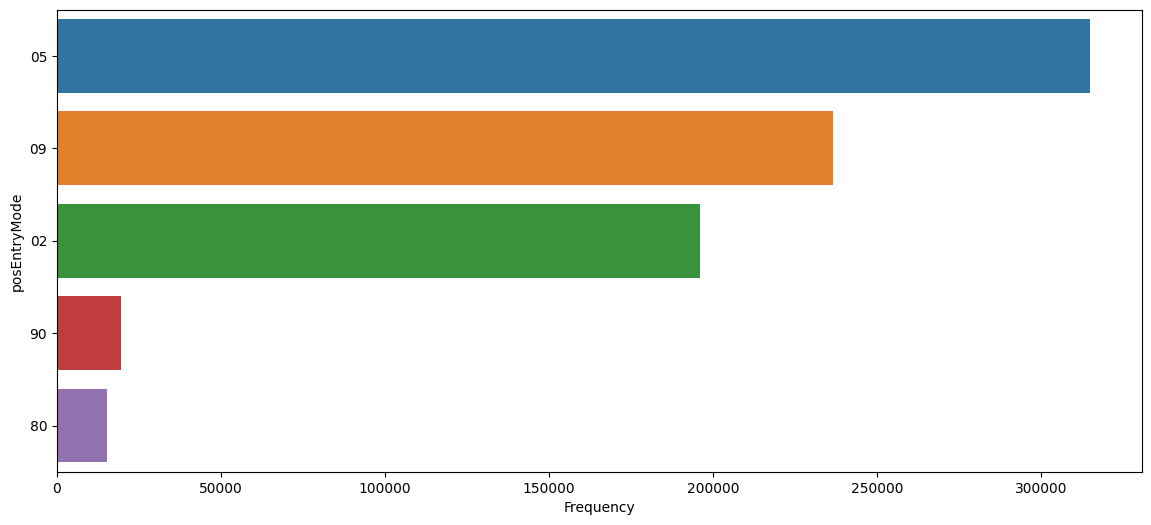

In [20]:
e=pd.DataFrame(df.posEntryMode.value_counts()).reset_index(drop=False)
e.columns=['posEntryMode','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="Frequency", y="posEntryMode", data=e) # draw barplot

**3 POS Condition Mode exists where "01" is dominant among all**

c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


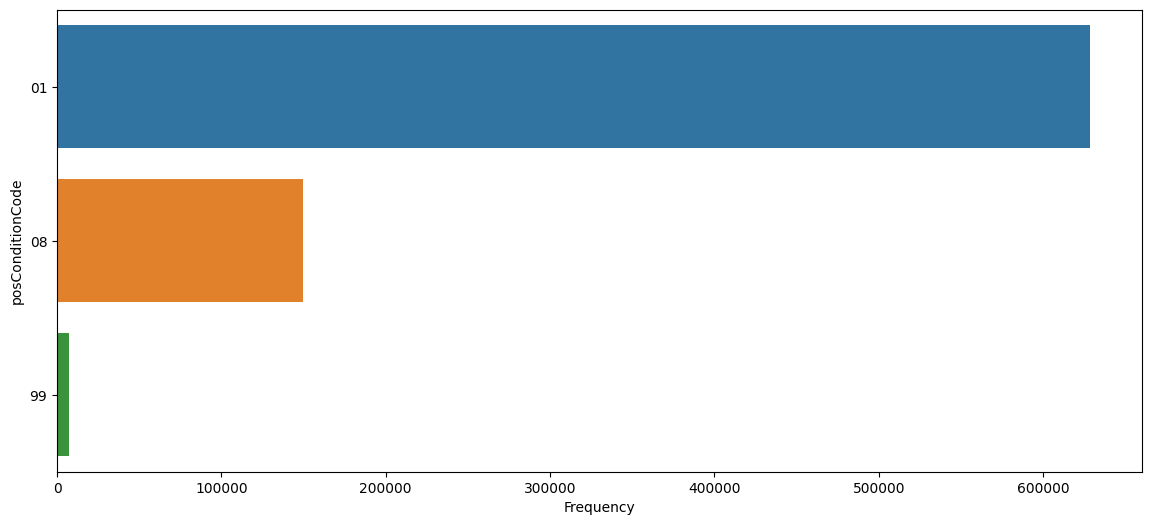

In [21]:
e=pd.DataFrame(df.posConditionCode.value_counts()).reset_index(drop=False)
e.columns=['posConditionCode','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="Frequency", y="posConditionCode", data=e) # draw barplot


**There are 3 transaction types:**

**1.Purchase**

**2.Reversal**

**3.Address Verification**

**where most values lie inside Purchase Type.**





c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


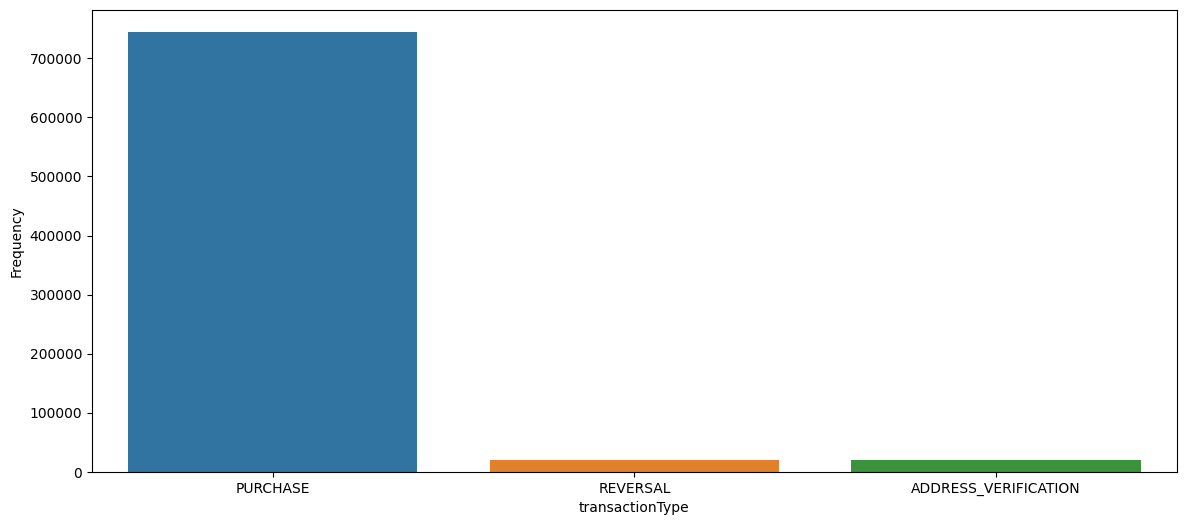

In [22]:
e=pd.DataFrame(df.transactionType.value_counts()).reset_index(drop=False)
e.columns=['transactionType','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="transactionType", y="Frequency", data=e) # draw barplot

**If card is Present during the transaction also plays an important role and dataset is fairly distributed among the two values as True/False**

c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


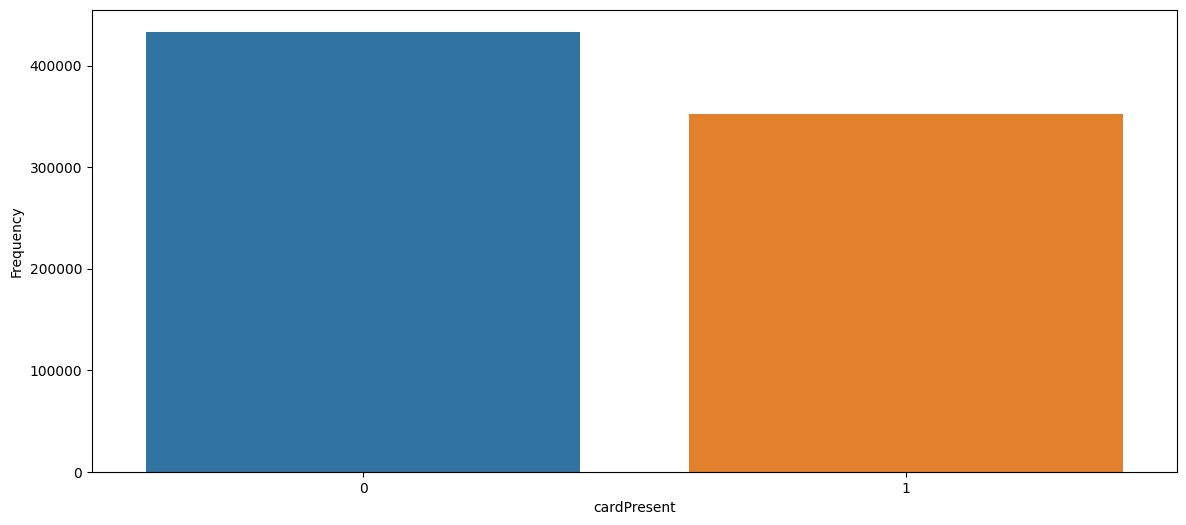

In [23]:
e=pd.DataFrame(df.cardPresent.value_counts()).reset_index(drop=False)
e.columns=['cardPresent','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="cardPresent", y="Frequency", data=e) # draw barplot

**Expiration Date Key In Match is highly skewed to 0 value**

c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


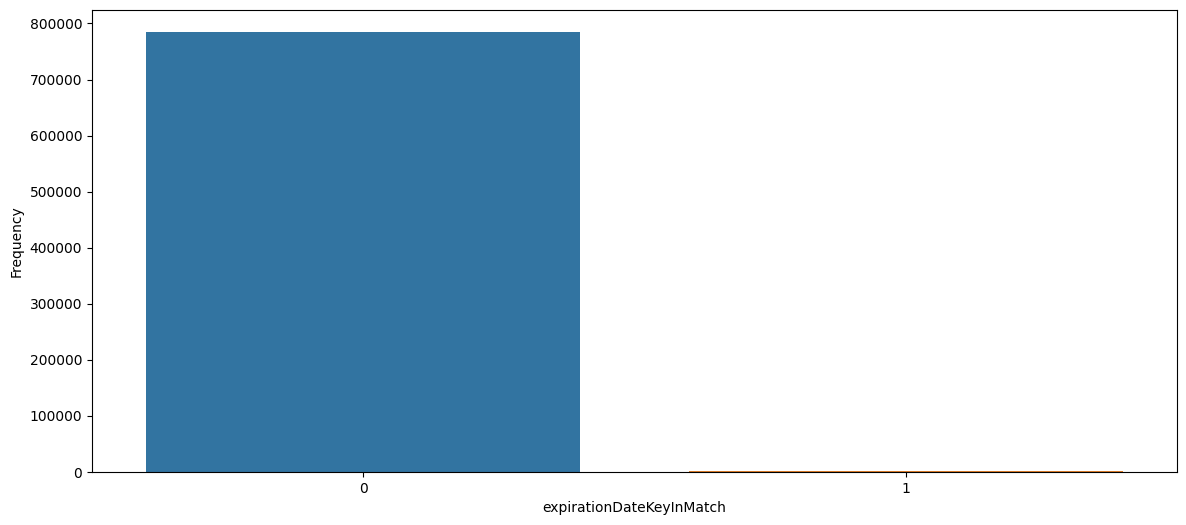

In [25]:
e=pd.DataFrame(df.expirationDateKeyInMatch.value_counts()).reset_index(drop=False)
e.columns=['expirationDateKeyInMatch','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="expirationDateKeyInMatch", y="Frequency", data=e) # draw barplot

In [26]:
df.expirationDateKeyInMatch.value_counts()

expirationDateKeyInMatch
0    785320
1      1043
Name: count, dtype: int64

**isFraud as described earlier is clearly an example of IMBALANCED DATSET with respect to this attribute. But It is expected to be like that in real world scenario as Frauds are always less than 5% with respect to whole dataset. Here it is 1.6%**

c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


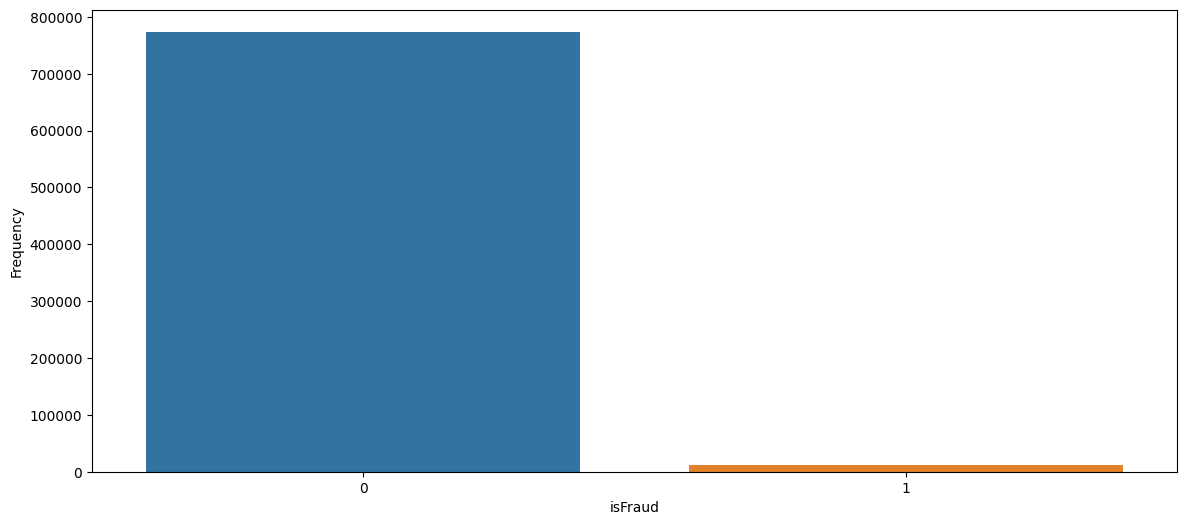

In [27]:
e=pd.DataFrame(df.isFraud.value_counts()).reset_index(drop=False)
e.columns=['isFraud','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="isFraud", y="Frequency", data=e) # draw barplot

**Gouping By with respect to Customer ID represents how many Unique Customers exist in the dataset which are 5000**

In [28]:
df.groupby(['customerId']).count()

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
customerId,,,,,,,,,,,,,,,,,,,,,
100088067,75,75,75,75,75,75,75,75,74,75,...,0,75,0,0,0,75,0,0,75,75
100108752,18,18,18,18,18,18,18,18,18,18,...,0,18,0,0,0,18,0,0,18,18
100328049,103,103,103,103,103,103,103,103,102,103,...,0,103,0,0,0,103,0,0,103,103
100663626,31,31,31,31,31,31,31,31,31,31,...,0,31,0,0,0,31,0,0,31,31
100737756,178,178,178,178,178,178,178,178,178,178,...,0,178,0,0,0,178,0,0,178,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999086814,677,677,677,677,677,677,674,677,673,675,...,0,677,0,0,0,677,0,0,677,677
999257059,160,160,160,160,160,160,159,160,158,160,...,0,160,0,0,0,160,0,0,160,160
999258704,88,88,88,88,88,88,88,88,86,88,...,0,88,0,0,0,88,0,0,88,88


**Account number is similar to Customer ID and represents 5000 unique entries**

In [29]:
df.groupby(['accountNumber']).count()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
accountNumber,,,,,,,,,,,,,,,,,,,,,
100088067,75,75,75,75,75,75,75,75,74,75,...,0,75,0,0,0,75,0,0,75,75
100108752,18,18,18,18,18,18,18,18,18,18,...,0,18,0,0,0,18,0,0,18,18
100328049,103,103,103,103,103,103,103,103,102,103,...,0,103,0,0,0,103,0,0,103,103
100663626,31,31,31,31,31,31,31,31,31,31,...,0,31,0,0,0,31,0,0,31,31
100737756,178,178,178,178,178,178,178,178,178,178,...,0,178,0,0,0,178,0,0,178,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999086814,677,677,677,677,677,677,674,677,673,675,...,0,677,0,0,0,677,0,0,677,677
999257059,160,160,160,160,160,160,159,160,158,160,...,0,160,0,0,0,160,0,0,160,160
999258704,88,88,88,88,88,88,88,88,86,88,...,0,88,0,0,0,88,0,0,88,88


**To know more about the transaction data set it is important to know the Top Merchants where most of the Transactions happen.**

**Here we can clearly see which are the Top Merchants:**

1.Uber

2.Lyft

3.oldnavy.com

4.staples.com

5.alibaba.com

6.apple.com

7.walmart.com

8.cheapfast.com

9.ebay.com

10.target.com

11.amazon.com

In [30]:
important_merchants = df['merchantName'].value_counts()
important_merchants = important_merchants.loc[important_merchants.values > 10000]
important_merchants

merchantName
Uber             25613
Lyft             25523
oldnavy.com      16992
staples.com      16980
alibaba.com      16959
apple.com        16898
walmart.com      16873
cheapfast.com    16858
ebay.com         16842
target.com       16813
amazon.com       16780
sears.com        16755
discount.com     16731
gap.com          16675
Name: count, dtype: int64

**Here we can clearly see that most transactions happen at:**


*   Online Retail

*   Food

*   Entertainment
*   Online Gifts


*   Ride Share


*   Hotels


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


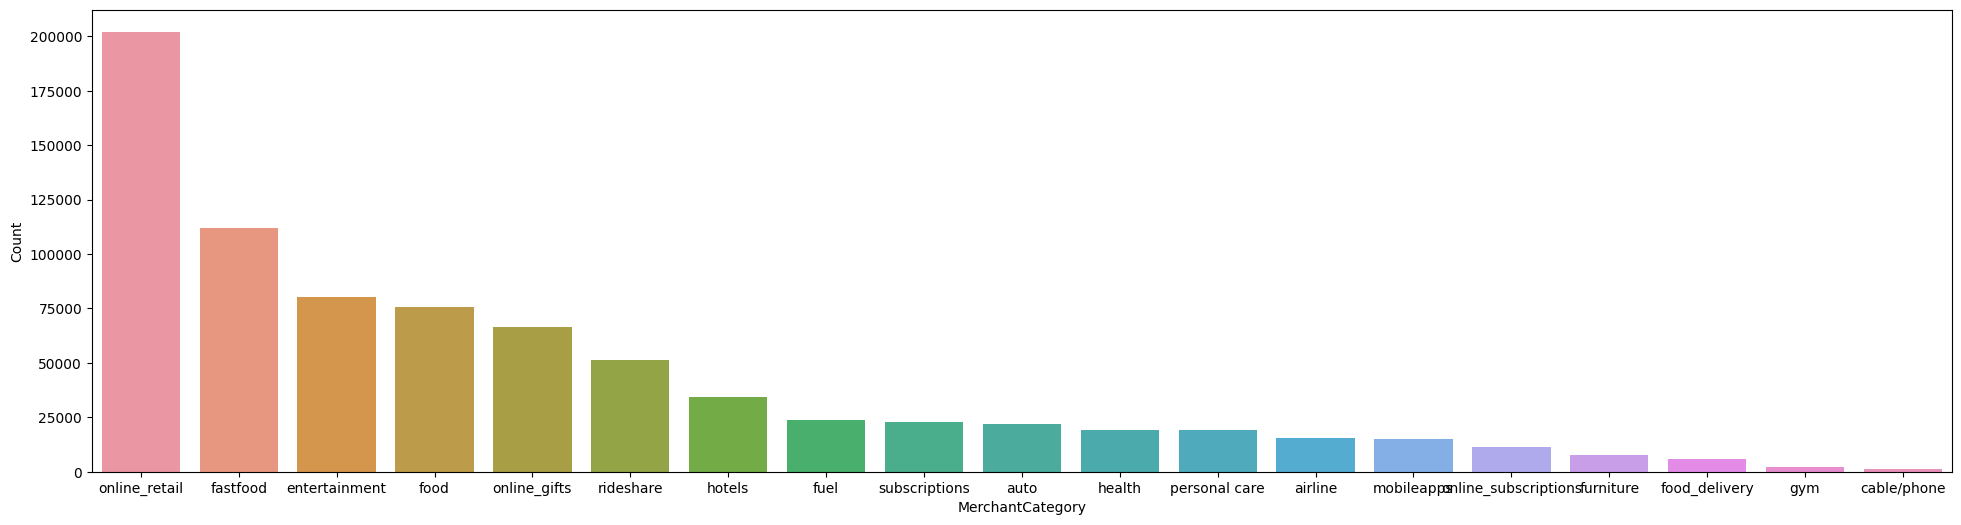

In [31]:
t=pd.DataFrame(df['merchantCategoryCode'].value_counts()).reset_index(drop=False)
t.columns=['MerchantCategory','Count'] 
plt.figure(figsize=(24,6)) 
ax = sns.barplot(x="MerchantCategory", y="Count", data=t) 

**Let's explore Numerical Valued Attributes and in Credit Card Transactions these attributes hold high importance**

In [32]:
df_num = df[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance' ]]

df_num

,creditLimit,availableMoney,transactionAmount,currentBalance
0,5000,5000.00,98.55,0.00
1,5000,5000.00,74.51,0.00
2,5000,5000.00,7.47,0.00
3,5000,5000.00,7.47,0.00
4,5000,5000.00,71.18,0.00
...,...,...,...,...
786358,50000,48904.96,119.92,1095.04
786359,50000,48785.04,18.89,1214.96
786360,50000,48766.15,49.43,1233.85
786361,50000,48716.72,49.89,1283.28


**Separatelty describing these numerical attributes to get the essence of data and its distribution.**

**Here we can see Available Money can also go Negative, which is -1005.63 as minimum value**

In [33]:
df_num.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


**Most of the Credit limits are under 10,000.**

**But some goes till 20,000 and 50,000 as well.**

**While data Modelling this information can be really useful**

Text(0.5, 0, 'credit Limit')

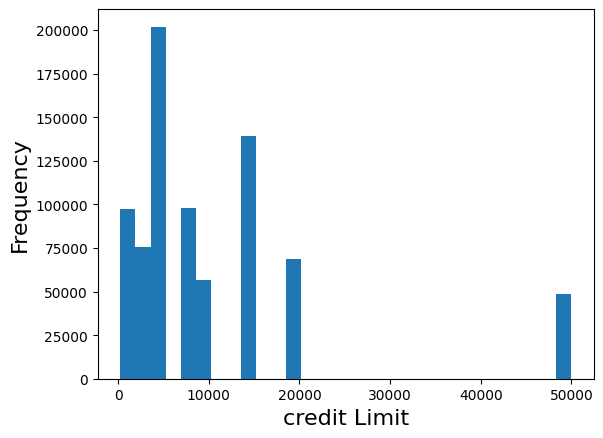

In [34]:
plt.hist(df['creditLimit'], bins = 30)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('credit Limit', fontsize = 16)

**Available Money mostly lie under the buckets of less than 10,000 and is Right Skewed, which actually makes sense**

Text(0.5, 0, 'available Money')

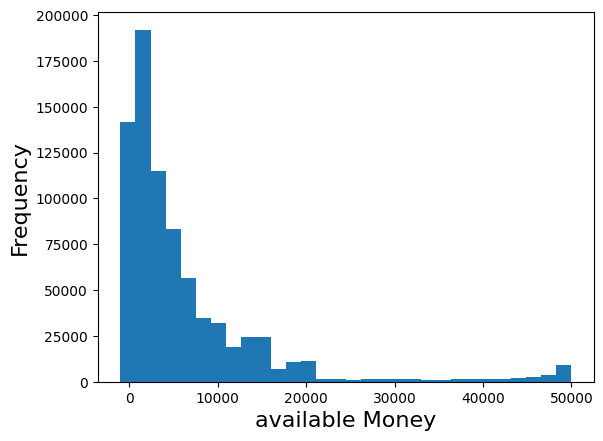

In [35]:
plt.hist(df['availableMoney'], bins = 30)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('available Money', fontsize = 16)

**Interestingly Transaction amount mostly falls under 500 and is Right Skewed**

Text(0.5, 0, 'transaction Amount')

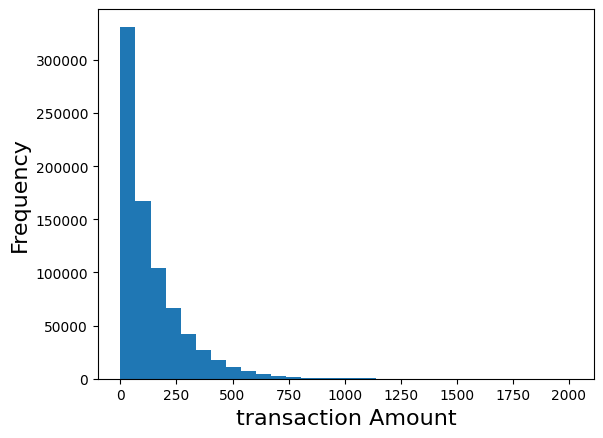

In [36]:
plt.hist(df['transactionAmount'], bins = 30)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('transaction Amount', fontsize = 16)

**The Current Balance is mostly under 10,000, it is also Right Skewed**

Text(0.5, 0, 'current Balance')

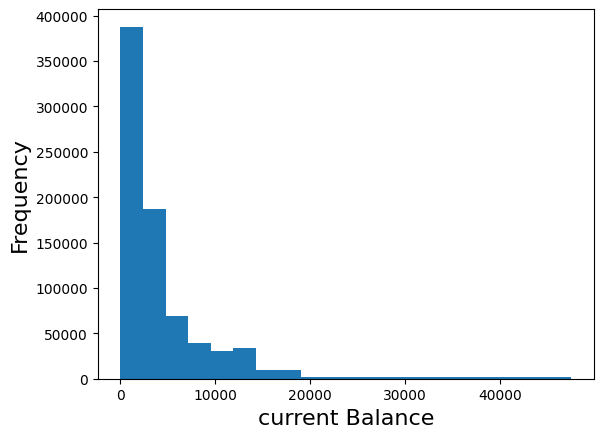

In [37]:
plt.hist(df['currentBalance'], bins = 20)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('current Balance', fontsize = 16)

**Box Plots help analyzing the Outliers in the datasets and the skewness**

**It shows how these Numerical Atrributes are Right Skewed**

<Axes: >

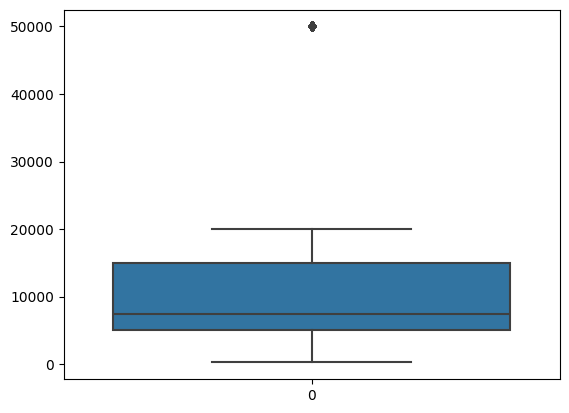

In [38]:
sns.boxplot(data=df_num['creditLimit'])

<Axes: >

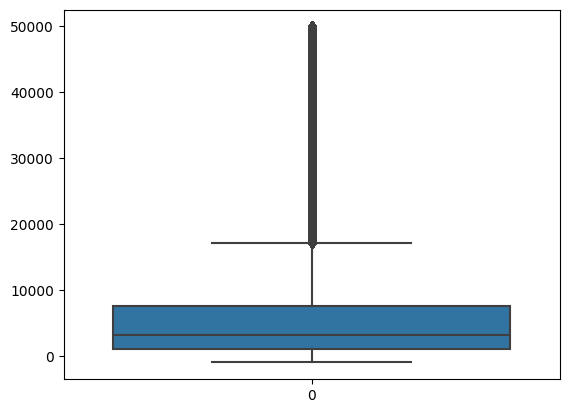

In [39]:
sns.boxplot(data=df_num['availableMoney'])

<Axes: >

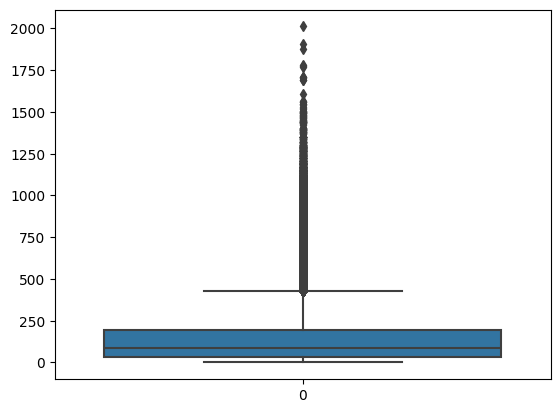

In [40]:
sns.boxplot(data=df_num['transactionAmount'])

<Axes: >

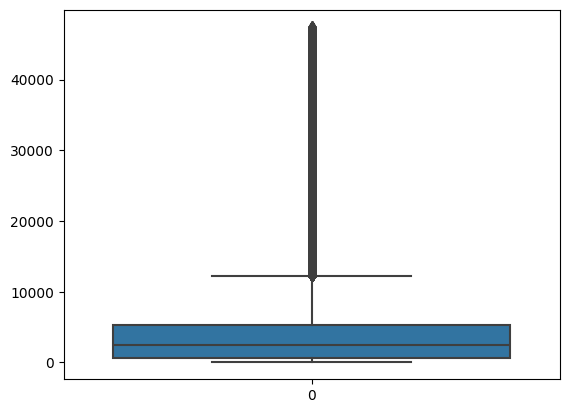

In [41]:
sns.boxplot(data=df_num['currentBalance'])

In [42]:
merchant_with_fraud = df.loc[df['isFraud'] == 1, ['merchantCategoryCode']]
merchant_with_fraud

,merchantCategoryCode
694,health
971,online_retail
1072,health
1113,online_retail
1321,online_retail
...,...
785680,online_retail
785713,fastfood
785888,online_retail
786054,online_gifts


**The graph below shows those Merchants where most of the fraudulent transactions happen.**

**Top 3 are:**


*   **Online Retail**

*   **Online Gifts**
*   **Ride Share**



Frauds Happening mostly according to this distribution: 


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


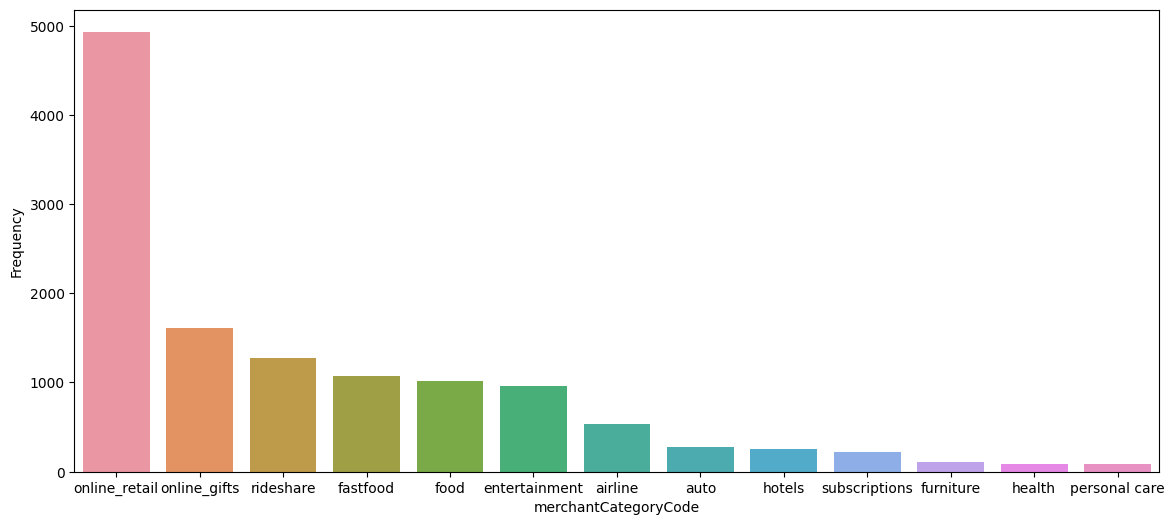

In [43]:
e=pd.DataFrame(merchant_with_fraud.merchantCategoryCode.value_counts()).reset_index(drop=False)
e.columns=['merchantCategoryCode','Frequency'] # rename columns
print("Frauds Happening mostly according to this distribution: ")
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="merchantCategoryCode", y="Frequency", data=e) # draw barplot

**The Merchant Names where most Fraud happens:**

**Top 5 are:**



1.   **Lyft**
2.   **ebay.com**

1.   **Fresh Flowers**
2.   **Uber**

1.   **walmart.com**


In [44]:
merchant_name__with_fraud = df.loc[df['isFraud'] == 1, ['merchantName']]

important_merchants = merchant_name__with_fraud['merchantName'].value_counts()
important_merchants = important_merchants.loc[important_merchants.values > 300]
print("Most Frauds Happening at these merchants:")
important_merchants

Most Frauds Happening at these merchants:


merchantName
Lyft             760
ebay.com         639
Fresh Flowers    553
Uber             512
walmart.com      446
cheapfast.com    442
sears.com        422
oldnavy.com      401
staples.com      399
alibaba.com      383
amazon.com       372
gap.com          369
target.com       362
apple.com        357
discount.com     346
Name: count, dtype: int64

**Fortunately, The account IDs which get most frauds can also be seen through dataset.**

**Top 3 Account IDs are:**


1.   **380680241**
2.   **782081187**

1.   **246251253**


In [45]:
accountNumber_with_fraud = df.loc[df['isFraud'] == 1, ['accountNumber']]

acc_fraud = accountNumber_with_fraud['accountNumber'].value_counts()
acc_fraud = acc_fraud.loc[acc_fraud.values > 200]
print("Most Frauds Happening on these accounts:")
acc_fraud

Most Frauds Happening on these accounts:


accountNumber
380680241    783
782081187    307
246251253    278
700725639    272
472288969    266
208319653    211
419709514    207
Name: count, dtype: int64

**Account IDs and Customer IDs are the same.**

In [46]:
customers_with_fraud = df.loc[df['isFraud'] == 1, ['customerId']]

cust_fraud = customers_with_fraud['customerId'].value_counts()
cust_fraud = cust_fraud.loc[cust_fraud.values > 200]
print("Most Frauds Happening with these customer Ids:")
cust_fraud

Most Frauds Happening with these customer Ids:


customerId
380680241    783
782081187    307
246251253    278
700725639    272
472288969    266
208319653    211
419709514    207
Name: count, dtype: int64

**Correlation Matrix between Numerical Attributes also tell important information about the given process.**

In [48]:
import pandas as pd
import numpy as np
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,creditLimit,availableMoney,transactionAmount,currentBalance
creditLimit,1.000000,0.834977,0.005581,0.653652
availableMoney,0.834977,1.000000,-0.010070,0.129332
transactionAmount,0.005581,-0.010070,1.000000,0.023905
currentBalance,0.653652,0.129332,0.023905,1.000000


# **Data Wrangling**

**Till know I didn't remove any empty Columns Now removing 6 empty columns.** 

In [49]:
df.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],
                  axis=1,inplace=True)
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,0,0,0
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,1,0,0
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,0,0,0
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,0,0,0
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,0,0,0
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,0,0,0
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,0,0,0
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,0,0,0


In [50]:
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,0,0,0
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,1,0,0
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,0,0,0
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,0,0,0
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,1,0,0


In [51]:
df_2 = df.copy()


**The assumption is Duplicate Transactions are any record other than Address Verification because it has Transaction Amount = 0**

In [52]:
df_2 = df_2[df_2.transactionType != "ADDRESS_VERIFICATION"]
df_2


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,0,0,0
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,1,0,0
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,0,0,0
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,0,0,0
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,0,0,0
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,0,0,0
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,0,0,0
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,0,0,0


**Adding Date Column in the Data Frame to computer Results independent of just Date-Time**

In [53]:
df_2['transactionDate'] = pd.to_datetime(df_2['transactionDateTime']).dt.date
df_2['transactionDate']

0         2016-08-13
1         2016-10-11
2         2016-11-08
3         2016-12-10
4         2016-03-24
             ...    
786358    2016-12-22
786359    2016-12-25
786360    2016-12-27
786361    2016-12-29
786362    2016-12-30
Name: transactionDate, Length: 766194, dtype: object

**Here I am taking those attributes which can uniquely identify and help in indentifying a duplicate transaction at a given point:**

**The attributes used are:**

*   **accountNumber (It will be unique for that customer)**

*   **transactionAmount (the amount needs to be check for duplicated occurances)**

*   **merchantName (where the transaction is actually taking place)**

*   **acqCountry (the country where it can take place)**
*   **accountOpenDate (account open date will be same)**


*   **merchantCategoryCode ( merchantName can come as an empty index, then this merchantCategoryCode will be most useful in that scenario)**

*   **cardLast4Digits (always help in analyzing duplicate tansactions)**



In [54]:
duplicate_trans = df_2[df_2.duplicated(['accountNumber', 'transactionAmount','merchantName', 'acqCountry' , 'accountOpenDate' ,'merchantCategoryCode','cardLast4Digits' ], keep = False)]
duplicate_trans

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.00,0,0,0,2016-11-08
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.00,0,0,0,2016-12-10
11,830329091,830329091,5000,5000.00,2016-12-07T16:34:04,40.75,GreenCook,US,US,09,...,2015-08-06,885,885,3143,PURCHASE,0.00,0,0,0,2016-12-07
12,830329091,830329091,5000,4959.25,2016-12-14T10:00:35,40.75,GreenCook,US,US,09,...,2015-08-06,885,885,3143,PURCHASE,40.75,0,0,0,2016-12-14
13,830329091,830329091,5000,4918.50,2016-12-20T18:38:23,40.75,GreenCook,US,US,09,...,2015-08-06,885,885,3143,PURCHASE,81.50,0,0,0,2016-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786346,732852505,732852505,50000,49536.24,2016-11-22T19:30:16,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,936,936,3783,PURCHASE,463.76,1,0,0,2016-11-22
786348,732852505,732852505,50000,49251.72,2016-11-25T13:39:10,18.89,hulu.com,US,US,09,...,2012-08-23,939,939,3388,PURCHASE,748.28,0,0,0,2016-11-25
786352,732852505,732852505,50000,49848.35,2016-12-07T14:05:14,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,936,936,3783,PURCHASE,151.65,1,0,0,2016-12-07
786357,732852505,732852505,50000,48956.44,2016-12-22T07:27:23,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,936,936,3783,PURCHASE,1043.56,1,0,0,2016-12-22


In [55]:
duplicate_trans.shape

(100716, 24)

**Frauds in Duplicated Transaction can expected to be more.**

**The Top 3 Merchants where duplicated transactions happened and Frauds took place are:**




1.   **Fresh Flowers**
2.   **Lyft**

1.   **ebay.com**







In [56]:
duplicate_trans_fraud = duplicate_trans.loc[duplicate_trans['isFraud'] == 1, ['merchantName']]

dup_fraud = duplicate_trans_fraud['merchantName'].value_counts()
dup_fraud = dup_fraud.loc[dup_fraud.values >= 30]
print("Most Frauds Happening within duplicates are at these places:")
dup_fraud

Most Frauds Happening within duplicates are at these places:


merchantName
Fresh Flowers                    69
Lyft                             58
ebay.com                         46
walmart.com                      39
cheapfast.com                    34
Uber                             34
American Airlines                34
sears.com                        32
Blue Mountain Online Services    31
oldnavy.com                      30
Name: count, dtype: int64

**Reversal Transactions can be found directly either by using the attribute Transaction Type.**

**That comes out to be Reversal = 20303**

**Transaction Amount of Reversal Transaction = 2821792.5**

In [57]:
len(df_2.loc[df_2['transactionType'] == 'REVERSAL'])

20303

In [58]:
np.sum(df_2.loc[df_2['transactionType'] == 'REVERSAL'].transactionAmount)

2821792.5

**Merchnats where Frauds took place according to the given attribute transaction type = Reversal in the original dataset:**



1.   **Lyft**
2.   **walmart.com**

1.   **gap.com**

In [59]:
df_2_rev = df_2.loc[df_2['isFraud'] == 1, ['merchantName','transactionType']]

df_2_rev = df_2_rev.loc[df_2_rev['transactionType'] == 'REVERSAL', ['merchantName']]

df_2_rev_fraud = df_2_rev['merchantName'].value_counts()
df_2_rev_fraud = df_2_rev_fraud.loc[df_2_rev_fraud.values >= 10]
print("Most Frauds Happening within Original data and reversal transaction type are at these places:")
df_2_rev_fraud

Most Frauds Happening within Original data and reversal transaction type are at these places:


merchantName
Lyft                 26
walmart.com          16
Fresh Flowers        15
gap.com              15
American Airlines    14
cheapfast.com        13
sears.com            12
ebay.com             11
apple.com            11
staples.com          11
oldnavy.com          10
Name: count, dtype: int64

**Another method to find Reversal Transaction is to look directly into the duplicated transactions:**

**Reversal Transactions in Duplicated records = 17826**

**Transaction Amount for Reversal Transactions in Duplicated records = 2669859.56**

In [60]:
len(duplicate_trans.loc[duplicate_trans['transactionType'] == 'REVERSAL'])

17826

In [61]:
np.sum(duplicate_trans.loc[duplicate_trans['transactionType'] == 'REVERSAL'].transactionAmount)

2669859.56

**Most Frauds that happen in Reversal Transactions of Duplicated Subset are for these Merchants:**



1.   **Lyft**

1.   **Fresh Flowers**
2.   **Walmart.com**


In [62]:
duplicate_trans_fraud = duplicate_trans.loc[duplicate_trans['isFraud'] == 1, ['merchantName','transactionType']]

reverse_trans_fraud = duplicate_trans_fraud.loc[duplicate_trans_fraud['transactionType'] == 'REVERSAL', ['merchantName']]

rev_fraud = reverse_trans_fraud['merchantName'].value_counts()
rev_fraud = rev_fraud.loc[rev_fraud.values >= 10]
print("Most Frauds Happening within Duplicate REVERSAL are at these places:")
rev_fraud

Most Frauds Happening within Duplicate REVERSAL are at these places:


merchantName
Lyft                 23
Fresh Flowers        14
gap.com              13
walmart.com          13
cheapfast.com        11
apple.com            11
staples.com          11
ebay.com             11
oldnavy.com          10
American Airlines    10
Name: count, dtype: int64

In [63]:
def timeToDaTe(t):
  return datetime.datetime.strptime(t, '%Y-%m-%dT%H:%M:%S')


**Multi Swipe Transactions**

**These can be find as grouping by the uniquely identifying attributes in such a sorted way, that if the subsequent transactions happen in next 3 minutes, They will be marked as Mutli-Swiped Transactions**

In [64]:
NonRevDup = duplicate_trans[duplicate_trans['transactionType'] != 'REVERSAL']
NonRevDup

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.00,0,0,0,2016-11-08
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,486,486,767,PURCHASE,0.00,0,0,0,2016-12-10
11,830329091,830329091,5000,5000.00,2016-12-07T16:34:04,40.75,GreenCook,US,US,09,...,2015-08-06,885,885,3143,PURCHASE,0.00,0,0,0,2016-12-07
12,830329091,830329091,5000,4959.25,2016-12-14T10:00:35,40.75,GreenCook,US,US,09,...,2015-08-06,885,885,3143,PURCHASE,40.75,0,0,0,2016-12-14
13,830329091,830329091,5000,4918.50,2016-12-20T18:38:23,40.75,GreenCook,US,US,09,...,2015-08-06,885,885,3143,PURCHASE,81.50,0,0,0,2016-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786346,732852505,732852505,50000,49536.24,2016-11-22T19:30:16,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,936,936,3783,PURCHASE,463.76,1,0,0,2016-11-22
786348,732852505,732852505,50000,49251.72,2016-11-25T13:39:10,18.89,hulu.com,US,US,09,...,2012-08-23,939,939,3388,PURCHASE,748.28,0,0,0,2016-11-25
786352,732852505,732852505,50000,49848.35,2016-12-07T14:05:14,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,936,936,3783,PURCHASE,151.65,1,0,0,2016-12-07
786357,732852505,732852505,50000,48956.44,2016-12-22T07:27:23,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,936,936,3783,PURCHASE,1043.56,1,0,0,2016-12-22


In [65]:
import datetime

MultiSwipeTrans = []
for i, g in NonRevDup.groupby(['accountNumber', 'transactionAmount','merchantName', 'acqCountry' , 'accountOpenDate' ,'merchantCategoryCode','cardLast4Digits' ]):
    prev_interval = datetime.datetime.strptime('1000-05-05T22:47:50', '%Y-%m-%dT%H:%M:%S')
    g['transactionDateTime'] = g['transactionDateTime'].apply(timeToDaTe)
    g = g.sort_values(by=['transactionDateTime'])
  
    for r_i, row in g.iterrows():
        time = row['transactionDateTime']
        if time < prev_interval:
            MultiSwipeTrans.append(r_i)
        prev_interval = (time + datetime.timedelta(seconds=180))
MultiSwipeDf = df.iloc[MultiSwipeTrans]

**Multi Swipe Transactions come out to be = 7422**

**Total Transaction Amount = 1098489.81**

In [66]:

print("MultiSwipe Transactions: ", len(MultiSwipeDf))
print("Total of transactions amount", np.sum(MultiSwipeDf['transactionAmount']))

MultiSwipe Transactions:  7422
Total of transactions amount 1098489.81


**The most Frauds happening in the Multi-Swipe Transaction subset are:**

**Top 3:**



1.   **ebay.com**
2.   **sears.com**

1.   **cheapfast.com**

In [67]:
ms_trans_fraud = MultiSwipeDf.loc[MultiSwipeDf['isFraud'] == 1, ['merchantName']]

ms_ext = ms_trans_fraud['merchantName'].value_counts()
ms_ext = ms_ext.loc[ms_ext.values >= 5]
print("Most Frauds Happening within Multi-Swipe Transactions are at these places:")
ms_ext

Most Frauds Happening within Multi-Swipe Transactions are at these places:


merchantName
ebay.com                         10
walmart.com                       7
cheapfast.com                     7
Uber                              7
sears.com                         7
American Airlines                 6
Blue Mountain Online Services     5
discount.com                      5
Name: count, dtype: int64

**Fraud Ratio in Duplicated Transactions are: 0.9%**

In [68]:
duplicate_trans['isFraud'].value_counts()

isFraud
0    99793
1      923
Name: count, dtype: int64

**Fraud Ratio in Reversal Transactions of Duplicated Data subset = 1.7%**

In [69]:
dup_rev = duplicate_trans.loc[duplicate_trans['transactionType'] == 'REVERSAL']
dup_rev['isFraud'].value_counts()

isFraud
0    17522
1      304
Name: count, dtype: int64

**Fraud Ratio in Reversal Transactions of Original Data Set = 1.68%**

In [70]:
df2_rev = df_2.loc[df_2['transactionType'] == 'REVERSAL']
df2_rev['isFraud'].value_counts()

isFraud
0    19966
1      337
Name: count, dtype: int64

**Fraud Ratio in Multi-Swipe Transactions = 1.76%**

In [71]:
MultiSwipeDf['isFraud'].value_counts()

isFraud
0    7293
1     129
Name: count, dtype: int64

# **Model, Classification, Removing Outliers, Further Cleaning, Feature Encoding, Feature Engineering, Metrics, Evaluation, Results, Further Improvement and Domains**


**Interquartile Ranges are generally used for removing the outliers in a numerical attribute**

In [72]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [73]:
df = remove_outlier(df, 'creditLimit' )
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,0,0,0
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,1,0,0
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,0,0,0
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,0,0,0
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786248,638498773,638498773,10000,916.10,2016-12-26T23:47:39,11.56,Popeyes #846110,US,US,09,...,2014-11-17,2014-11-17,387,387,4635,PURCHASE,9083.90,1,0,0
786249,638498773,638498773,10000,904.54,2016-12-27T06:20:13,263.51,Hardee's #855967,US,US,90,...,2014-11-17,2014-11-17,387,387,4635,PURCHASE,9095.46,1,0,0
786250,638498773,638498773,10000,641.03,2016-12-27T19:37:19,184.59,AMC #724446,US,US,05,...,2014-11-17,2014-11-17,387,387,4635,PURCHASE,9358.97,1,0,0
786251,638498773,638498773,10000,6278.77,2016-12-28T07:43:14,25.19,Shell Gas #898217,US,US,05,...,2014-11-17,2014-11-17,175,175,321,PURCHASE,3721.23,1,0,0


**We can see which buckets are removed from the dataset, as for Models to generalize the dataset well it is advised to remove outliers.**

c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


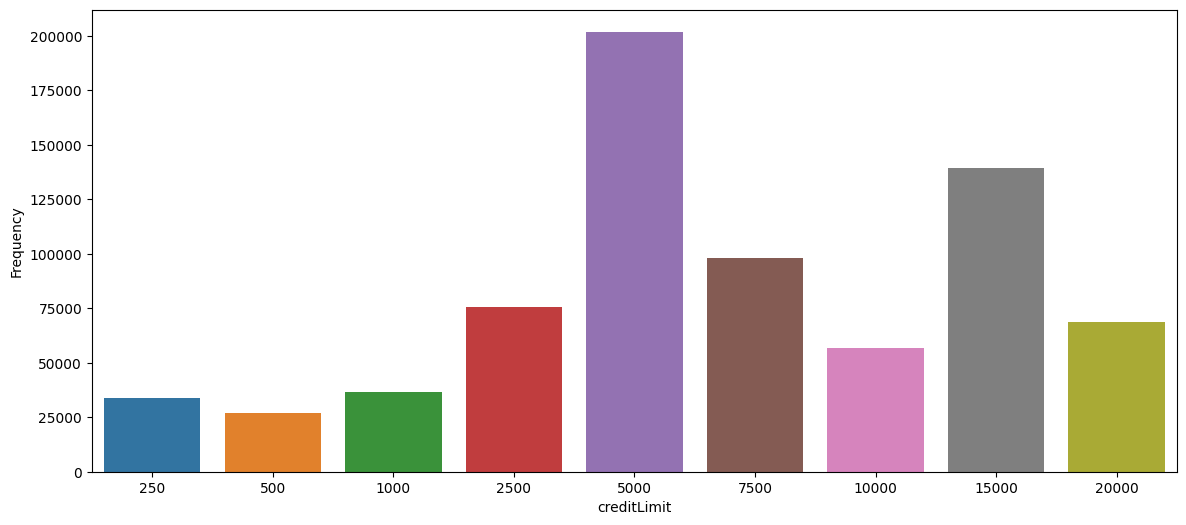

In [74]:
e=pd.DataFrame(df.creditLimit.value_counts()).reset_index(drop=False)
e.columns=['creditLimit','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="creditLimit", y="Frequency", data=e) # draw barplot

Text(0.5, 0, 'creditLimit')

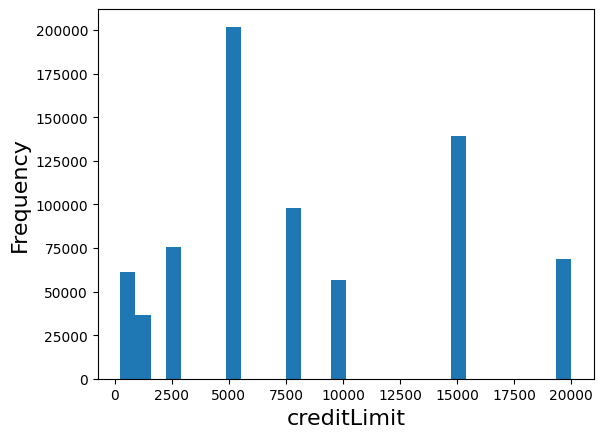

In [75]:
plt.hist(df['creditLimit'], bins = 30)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('creditLimit', fontsize = 16)

Text(0.5, 0, 'availableMoney')

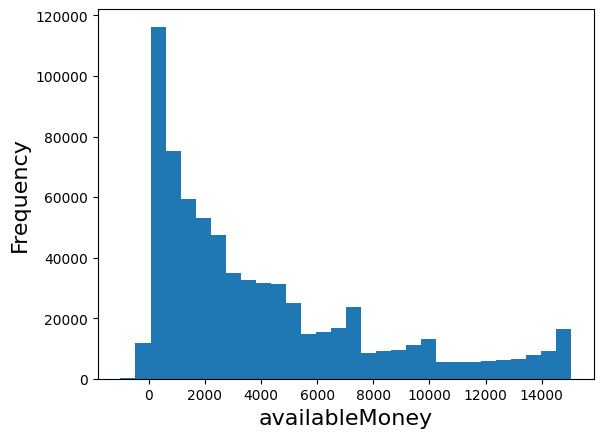

In [76]:
df = remove_outlier(df, 'availableMoney' )

plt.hist(df['availableMoney'], bins = 30)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('availableMoney', fontsize = 16)

Text(0.5, 0, 'transactionAmount')

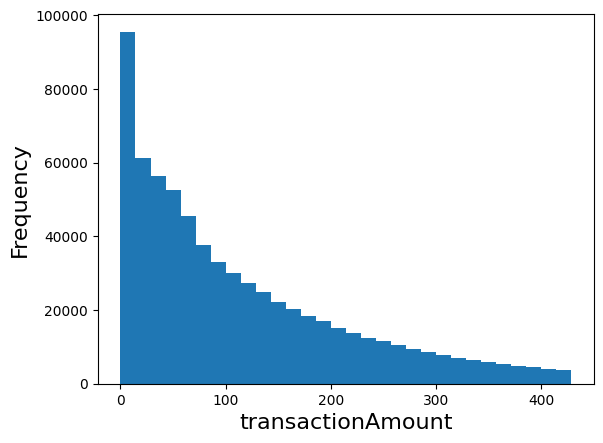

In [77]:
df = remove_outlier(df, 'transactionAmount' )

plt.hist(df['transactionAmount'], bins = 30)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('transactionAmount', fontsize = 16)

Text(0.5, 0, 'currentBalance')

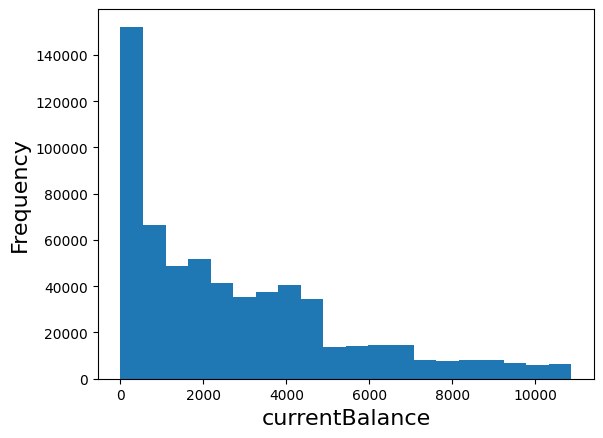

In [78]:
df = remove_outlier(df, 'currentBalance' )

plt.hist(df['currentBalance'], bins = 20)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('currentBalance', fontsize = 16)

**Now Box Plots are again drawn to help visualize how outliers were impacting the overall skewness**

<Axes: >

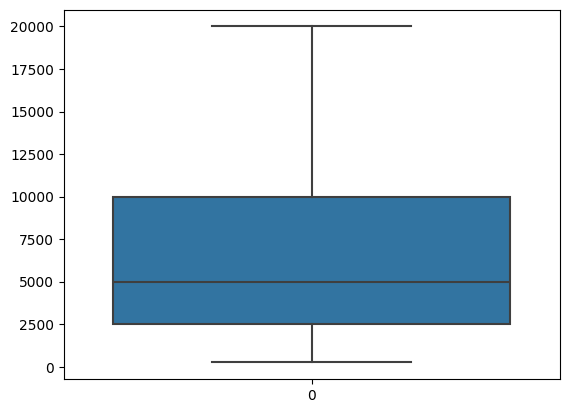

In [79]:
sns.boxplot(data=df['creditLimit'])

<Axes: >

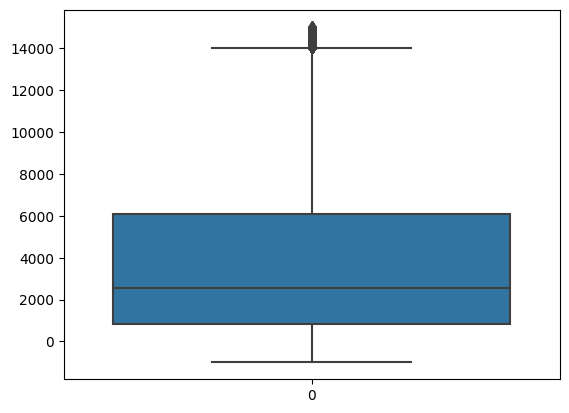

In [80]:
sns.boxplot(data=df['availableMoney'])

<Axes: >

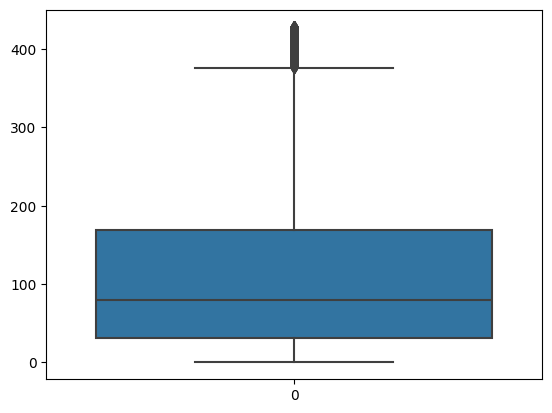

In [81]:
sns.boxplot(data=df['transactionAmount'])

<Axes: >

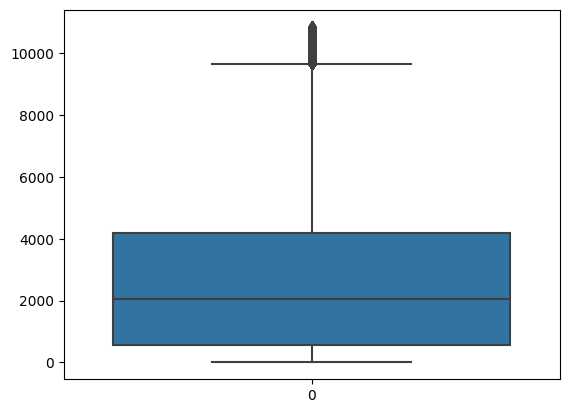

In [82]:
sns.boxplot(data=df['currentBalance'])

In [83]:
df.shape

(617105, 23)

#**Feature Engineering**

**Making an additional Column derived from the equality of CardCVV and EnteredCVV as shown**

In [84]:
df['CVVMatched'] = df['cardCVV'] == df['enteredCVV']

**4 times that represent morning, afternoon/evening, night and late/mid night are also added as feature**

In [85]:
def time(t):
  if isinstance(t, str):
    t = datetime.datetime.strptime(t,'%Y-%m-%dT%H:%M:%S').time()

    t1 = datetime.datetime.strptime('05:00:00','%H:%M:%S').time()
    t2 = datetime.datetime.strptime('11:00:00','%H:%M:%S').time()
    t3 = datetime.datetime.strptime('17:00:00','%H:%M:%S').time()
    t4 = datetime.datetime.strptime('23:00:00','%H:%M:%S').time()    

    if t >= t1 and t < t2:
      return 0
    elif t >= t2 and t < t3:
      return 1
    elif t >= t3 and t < t4:
      return 2
    elif t >= t4 or t < t1:
      return 3
      
df['transactionTimeCat'] = df['transactionDateTime'].apply(time) 

In [86]:
df['transactionTimeCat'].value_counts()

transactionTimeCat
2    154956
1    154273
0    154011
3    153865
Name: count, dtype: int64

In [87]:
df['CVVMatched'].value_counts()

CVVMatched
True     611545
False      5560
Name: count, dtype: int64

**The Final Numbers of Columns Selected are 16, I removed the unique identifiers and empty columns.**

**Further Principal Component Analysis can also be tried to reduce the dimensions further but for the given case it is not required.**

**Variance of the dataset is still maintained to be 99%**

In [88]:
df = df.drop(columns=['accountNumber','customerId', 'transactionDateTime', 'transactionDateTime', 'cardLast4Digits', 'cardCVV', 'enteredCVV', 'accountOpenDate', 'dateOfLastAddressChange', 'currentExpDate'])
print('Final total columns: ', len(df.columns))

Final total columns:  16


**Transormation from Categorical and Booleans to Numerical**

In [89]:
df[["CVVMatched" ]] *= 1

In [90]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
columns = ['merchantName', 'acqCountry', 'merchantCountryCode', 'merchantCategoryCode', 'transactionType', 'posEntryMode', 'posConditionCode']
for i in columns:
    df[i] = le.fit_transform(df[i])

In [91]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mode()[0])

**As the Data is Imbalanced, so to run classification models efficiently it is advised to use a Over or Under Sampling technique to balance the dataset for better results**

**Here Metrics are very important:**

*   **For Imbalanced Data Sets F1 Score is a good metric.**
*   **Precision and Recall can also be checked as Precision is important in identifying fraud cases precisely because banks do not want to decline a valid transaction.**

*   **Accuracy Measure can only be used after making the dataset balanced, in our modelling that can also come handy**


**Using UnderSampling Technique**

In [92]:
from imblearn.under_sampling import RandomUnderSampler

y = df['isFraud']
X = df.drop(columns = ['isFraud'])
RUS = RandomUnderSampler()
X, y = RUS.fit_resample(X, y)
print(len(X), len(y))

17694 17694


**For Model Evaluation Always Train the model on Training dataset and Verify the evaluation metrics on test data sets.**


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

14155 3539
14155 3539


**Class for Training and Evaluation:**

In [94]:
class TrainAndEval:

  def __init__(self, clf, X_train, y_train, X_test, y_test):
    self.clf = clf
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test

  def train(self):
    return self.clf.fit(self.X_train, self.y_train)

  def eval(self):
    y_pred = self.clf.predict(self.X_test)
    tn, fp, fn, tp = confusion_matrix(self.y_test,y_pred).ravel()
    print('True Negatives:', tn)
    print('False Positives:', fp)
    print('False Negatives:', fn)
    print('True Positives:', tp)
    print(classification_report(self.y_test,y_pred))

**Reason for choosing Classifiers and Particularly Tree Structures:**



*   **Whenever you have a given label to model around, classification is the best choice.**

*   **Tree Based Classifiers are best in terms of interpretation of the end results. Because in real world scenarios, detecting fraud is just one part. But what actions to take to handle and optimize the processes, these tree structures help through the attributes hierarchy that which actions can be taken and some buckets can be made to start with.**

*   **Simple SVM and Logistic regression are always the best baselines to compare-with**


# **Gradient Boosting Classifier:**

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': [10, 50, 125, 500], 'max_depth': [1, 3, 5], 
          'learning_rate': [0.05, 0.1, 0.5, 0.9]}
grid = GridSearchCV(estimator=GradientBoostingClassifier(random_state = 0), param_grid=params, cv=5, verbose=3)
grid = grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.631 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.615 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.599 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.620 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.610 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.651 total time=   0.5s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.643 total time=   0.4s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.639 total time=   0.4s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.647 total time=   0.4s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.638 total t

In [100]:
clf = grid.best_estimator_
GBT = TrainAndEval(clf, X_train, y_train, X_test, y_test)
GBT.eval()

True Negatives: 1249
False Positives: 522
False Negatives: 502
True Positives: 1266
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1771
           1       0.71      0.72      0.71      1768

    accuracy                           0.71      3539
   macro avg       0.71      0.71      0.71      3539
weighted avg       0.71      0.71      0.71      3539



**We can see that Gradient Boosting Classifier gave good results:**


*   **F1 Score = 71%**
*   **Precision = 71%**
*   **Recall = 71%**
*   **Accuracy = 71%**

# **XGBoost**

In [101]:
params = {'n_estimators': [10, 50, 125, 500], 'max_depth': [1, 3, 5], 
          'learning_rate': [0.05, 0.1, 0.5,  0.9]
        }

gridXGB = GridSearchCV(estimator=XGBClassifier(), param_grid=params, cv=5, verbose=3)
gridXGB = gridXGB.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.632 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.615 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.599 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.621 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.619 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.655 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.644 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.639 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.647 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.641 total t

In [102]:
gridXGB = gridXGB.best_estimator_
XGB = TrainAndEval(gridXGB, X_train, y_train, X_test, y_test)
XGB.eval()

True Negatives: 1262
False Positives: 509
False Negatives: 496
True Positives: 1272
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1771
           1       0.71      0.72      0.72      1768

    accuracy                           0.72      3539
   macro avg       0.72      0.72      0.72      3539
weighted avg       0.72      0.72      0.72      3539



**We can see that Grid XGBoost Classifier gave better results than the last one:**


*   **F1 Score = 72%**
*   **Precision = 72%**
*   **Recall = 72%**
*   **Accuracy = 72%**

# **SVM**

In [103]:
params = {
    'C': [0.05, 0.1, 0.5, 1, 10, 50, 100],
    'kernel': ['poly', 'rbf'],
    'degree': [1, 2, 3, 4]
}

gridSVM = GridSearchCV(estimator=SVC(), param_grid=params, cv=5, verbose=3)
gridSVM = gridSVM.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END .....C=0.05, degree=1, kernel=poly;, score=0.508 total time=   2.9s
[CV 2/5] END .....C=0.05, degree=1, kernel=poly;, score=0.515 total time=   2.6s
[CV 3/5] END .....C=0.05, degree=1, kernel=poly;, score=0.521 total time=   2.7s
[CV 4/5] END .....C=0.05, degree=1, kernel=poly;, score=0.506 total time=   2.6s
[CV 5/5] END .....C=0.05, degree=1, kernel=poly;, score=0.516 total time=   2.9s
[CV 1/5] END ......C=0.05, degree=1, kernel=rbf;, score=0.527 total time=   4.4s
[CV 2/5] END ......C=0.05, degree=1, kernel=rbf;, score=0.526 total time=   4.2s
[CV 3/5] END ......C=0.05, degree=1, kernel=rbf;, score=0.548 total time=   4.2s
[CV 4/5] END ......C=0.05, degree=1, kernel=rbf;, score=0.537 total time=   4.4s
[CV 5/5] END ......C=0.05, degree=1, kernel=rbf;, score=0.542 total time=   4.5s
[CV 1/5] END .....C=0.05, degree=2, kernel=poly;, score=0.495 total time=   3.0s
[CV 2/5] END .....C=0.05, degree=2, kernel=poly

In [104]:
gridSVM = gridSVM.best_estimator_
SVM = TrainAndEval(gridSVM, X_train, y_train, X_test, y_test)
SVM.eval()

True Negatives: 1259
False Positives: 512
False Negatives: 863
True Positives: 905
              precision    recall  f1-score   support

           0       0.59      0.71      0.65      1771
           1       0.64      0.51      0.57      1768

    accuracy                           0.61      3539
   macro avg       0.62      0.61      0.61      3539
weighted avg       0.62      0.61      0.61      3539



**The Results of Grid SVM Classifier:**


*   **F1 Score = 59%**
*   **Precision = 65%**
*   **Recall = 54%**
*   **Accuracy = 62%**

**The reason Random Forest is used but not simple Decision Tree becasue decision trees tend to over-fit quickly.**

# **Random Forest**

In [105]:
from sklearn.ensemble import RandomForestClassifier
params = {
    'n_estimators': [10, 50, 100, 300, 500],
    'max_depth': [1, 3, 5],
    'bootstrap': [True, False],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

gridRF = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, verbose=3)
gridRF = gridRF.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.640 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.621 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.604 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.591 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.619 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.631 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.637 total time=   0.1s
[CV 3/5] END

In [106]:
gridRF = gridRF.best_estimator_
RF = TrainAndEval(gridRF, X_train, y_train, X_test, y_test)
RF.eval()

True Negatives: 1185
False Positives: 586
False Negatives: 587
True Positives: 1181
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1771
           1       0.67      0.67      0.67      1768

    accuracy                           0.67      3539
   macro avg       0.67      0.67      0.67      3539
weighted avg       0.67      0.67      0.67      3539



**The Results of Random Forest Classifier:**


*   **F1 Score = 67%**
*   **Precision = 69%**
*   **Recall = 65%**
*   **Accuracy = 67%**

# **Logistic Regression**

In [107]:
params = {
    'penalty': ['l2', 'none'],
    'C': [0.005, 0.01, 0.1, 0.5, 1, 10],
    'fit_intercept': [True, False],
    'n_jobs': [-1]
}

gridLR = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=params, cv=5, verbose=3)
gridLR = gridLR.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.638 total time=   0.8s
[CV 2/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.635 total time=   0.3s
[CV 3/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.614 total time=   0.3s
[CV 4/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.625 total time=   0.5s
[CV 5/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.621 total time=   0.4s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.641 total time=   0.3s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.630 total time=   0.4s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.626 total time=   0.4s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.3s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.619 total time=   0.3s
[CV 1/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.638 total time=   0.4s
[CV 2/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.632 total time=   0.3s
[CV 3/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.625 total time=   0.6s
[CV 4/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.625 total time=   0.3s
[CV 5/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.619 total time=   0.3s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.635 total time=   0.4s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.630 total time=   0.5s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.626 total time=   0.7s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.624 total time=   0.5s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.619 total time=   0.7s
[CV 1/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.637 total time=   0.7s
[CV 2/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.631 total time=   0.7s
[CV 3/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.626 total time=   0.5s
[CV 4/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.624 total time=   0.8s
[CV 5/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.623 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.641 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.630 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.626 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.619 total time=   1.0s
[CV 1/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.641 total time=   1.0s
[CV 2/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.632 total time=   1.0s
[CV 3/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.626 total time=   1.0s
[CV 4/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.625 total time=   1.0s
[CV 5/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.635 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.630 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.626 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.624 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.619 total time=   1.0s
[CV 1/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.636 total time=   1.0s
[CV 2/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.636 total time=   1.0s
[CV 3/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.626 total time=   1.0s
[CV 4/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.624 total time=   1.0s
[CV 5/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.619 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.641 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.630 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.626 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.619 total time=   1.0s
[CV 1/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.635 total time=   1.0s
[CV 2/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.636 total time=   1.0s
[CV 3/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.615 total time=   1.0s
[CV 4/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.624 total time=   1.0s
[CV 5/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.635 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.630 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.626 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.624 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.619 total time=   1.0s
[CV 1/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.641 total time=   1.0s
[CV 2/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.636 total time=   1.0s
[CV 3/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.626 total time=   1.0s
[CV 4/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.624 total time=   1.0s
[CV 5/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.623 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.641 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.630 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.626 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.619 total time=   1.0s
[CV 1/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.641 total time=   1.0s
[CV 2/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.630 total time=   1.0s
[CV 3/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.626 total time=   1.0s
[CV 4/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.624 total time=   1.0s
[CV 5/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.635 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.630 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.626 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.624 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.619 total time=   1.0s
[CV 1/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.636 total time=   1.0s
[CV 2/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.630 total time=   1.0s
[CV 3/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.614 total time=   1.0s
[CV 4/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.624 total time=   1.0s
[CV 5/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.619 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.641 total time=   0.9s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.630 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.626 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.619 total time=   1.0s
[CV 1/5] END C=1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.641 total time=   0.9s
[CV 2/5] END C=1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.630 total time=   1.0s
[CV 3/5] END C=1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.626 total time=   1.0s
[CV 4/5] END C=1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.624 total time=   1.0s
[CV 5/5] END C=1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.635 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.630 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.626 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END C=1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.624 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.619 total time=   1.0s
[CV 1/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.641 total time=   1.0s
[CV 2/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.630 total time=   1.0s
[CV 3/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.626 total time=   1.0s
[CV 4/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.624 total time=   1.0s
[CV 5/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.619 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.641 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.630 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.626 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.619 total time=   1.0s
[CV 1/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.641 total time=   1.0s
[CV 2/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.630 total time=   1.0s
[CV 3/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.615 total time=   1.0s
[CV 4/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.624 total time=   1.0s
[CV 5/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.635 total time=   1.6s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.630 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.626 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.624 total time=   1.0s


c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\abhis\anaconda3\envs\pytorch_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.619 total time=   1.0s


In [108]:
gridLR = gridLR.best_estimator_
LR = TrainAndEval(gridLR, X_train, y_train, X_test, y_test)
LR.eval()

True Negatives: 1191
False Positives: 580
False Negatives: 734
True Positives: 1034
              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1771
           1       0.64      0.58      0.61      1768

    accuracy                           0.63      3539
   macro avg       0.63      0.63      0.63      3539
weighted avg       0.63      0.63      0.63      3539



**The Results of Logisitc Regression Classifier:**


*   **F1 Score = 63%**
*   **Precision = 66%**
*   **Recall = 61%**
*   **Accuracy = 64%**

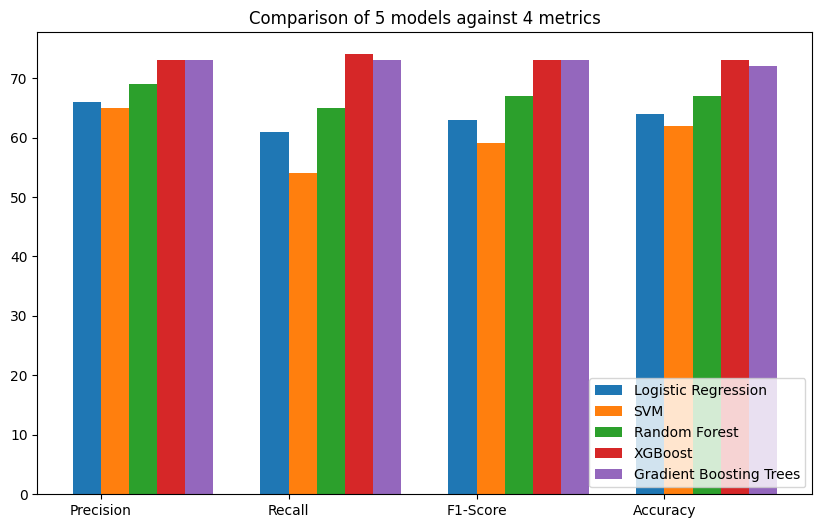

In [109]:
XAxis = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
LRValues = [66,61,63,64]
SVMValues = [65, 54, 59, 62]
RFValues = [69, 65, 67, 67]
XGBValues = [73, 74, 73, 73]
GBTValues = [73, 73, 73, 72]

bar_width = 0.15
index = np.arange(4)

fig, ax = plt.subplots()
LR = ax.bar(index,LRValues, width=bar_width, label = "Logistic Regression") 
SVM = ax.bar(index+bar_width,SVMValues, width=bar_width, label = "SVM") 
RF = ax.bar(index+bar_width+bar_width,RFValues, width=bar_width, label = "Random Forest") 
XGB = ax.bar(index+bar_width+bar_width+bar_width,XGBValues, width=bar_width, label = "XGBoost") 
GBT = ax.bar(index+bar_width+bar_width+bar_width+bar_width,GBTValues, width=bar_width, label = "Gradient Boosting Trees") 


ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Comparison of 5 models against 4 metrics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(XAxis)
ax.legend(loc = 'lower right')

fig.set_size_inches(10,6)

plt.show()

fig.savefig('MetricsModels.png',dpi = 200)

# **RESULTS**

* **It can clearly be seen that XGBoost performed better than all the other classifiers:**

* **Where F1 Score and Accuracy of XGBoost is highest = 73% and Precision of 73% to detect frauds**

* **Multiple modules of Machine Learning pipeline are used, Data Visualizations, Data Analysis, Data wrangling, Feature engineering, Predictive Modelling, Interpretation of the model, comparing results.** 

* **Various Metrics such as Precision, Recall, Accuracy, F1 Scores and Balanced Accuracy are checked.**

* **Logistic regression is always the best baselines to compare-with. Here we got significant 62\% accuracy.**

# **Further Improvements and Remarks:**

* Clustering can also be done where labels are not required to get other meaningful insights out of data.
  
* In the data set we had clearly seen that there were some Customer IDs which were highly fraudulent. So, a user-profiling based statistical model would significantly improve the results.

* Nothing beats the quality of data. So running test-statistics could also help in analyzing the data further.

* Important data acquisition ( either by client, business teams or an external API) and rigorous feature engineering.

* Better way to fill the missing values in columns, based on the distribution of the data column

* Better way to handle outliers. In case of large number of records people use Auto-encoders as well.

* Time series based anomaly detection in the dataset and then modeling it appropriately
